### Step 1: Import Necessary Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Step 2: Load and Explore the Dataset

In [5]:
df = pd.read_csv('1.SLR.csv')
df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [6]:
print(df.head())
print(df.info())
print(df.describe())

   area         prices
0  1000  316404.109589
1  1500  384297.945205
2  2300  492928.082192
3  3540  661304.794500
4  4120  740061.643836
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    13 non-null     int64  
 1   prices  13 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 336.0 bytes
None
              area        prices
count    13.000000  1.300000e+01
mean   4440.000000  7.835137e+05
std    2547.825871  3.459633e+05
min    1000.000000  3.164041e+05
25%    2300.000000  4.929281e+05
50%    4120.000000  7.400616e+05
75%    5490.000000  9.260908e+05
max    9000.000000  1.402705e+06


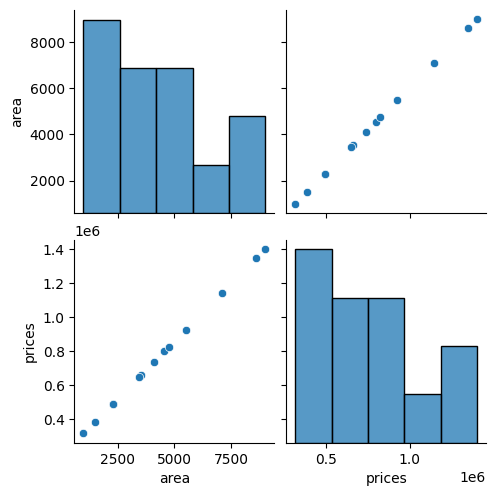

In [7]:
sns.pairplot(df)

### Step 3: Preprocess the Data

In [8]:
df.fillna(df.mean(), inplace=True)

In [9]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
df.head()

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794500
4,4120,740061.643836


In [15]:
X = df[['area']]  # Independent variables
y = df['prices']  #dependent variable

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Fit the Linear Regression Model (Scikit-Learn)

In [18]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 180616.43835187843
Coefficients: [135.78767123]


### Step 5: Evaluate the Model

In [20]:
y_pred = model.predict(X_test)

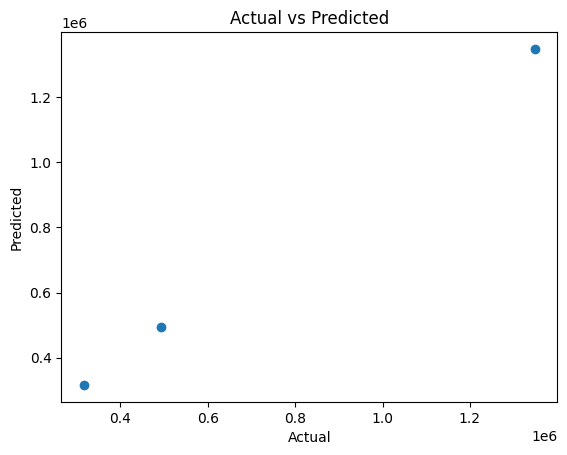

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 8.155114067992533e-12
R² Score: 1.0


### Step 7: Check Assumptions of Linear Regression

1. Linearity

RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

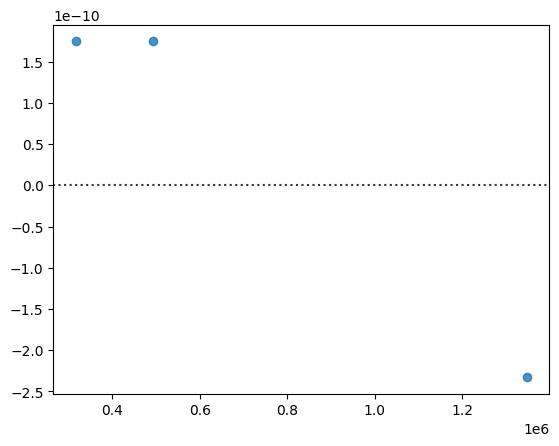

In [23]:
sns.residplot(x=y_test, y=y_pred, lowess=True)
plt.title("Residuals vs Fitted")
plt.show()

2. Homoscedasticity

In [ ]:
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.show()


3. Normality of Residuals

In [ ]:
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.show()
